# GLOBAL FOOD PRICES

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
gfp = pd.read_csv('wfpvam_foodprices_main.csv')

In [3]:
#Setting display
pd.set_option('display.max_columns', 700) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000) 

In [4]:
gfp.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [5]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1960375 rows and 18 columns


In [6]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960375 entries, 0 to 1960374
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 269.2+ MB


In [7]:
gfp.rename(columns={'adm0_name':'country',
                   'adm1_name':'city',
                   'mkt_name':'market',
                    'cm_name':'product',
                   'cur_name':'currency',
                    'mp_price':'price',
                    'um_name' : 'unit',
                    'pt_name':'type'},
                   inplace=True)

In [8]:
gfp.drop(['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'cur_id', 'pt_id', 'um_id', 'mp_commoditysource'], axis = 1, inplace = True)

In [9]:
gfp.head()

,country,city,market,product,currency,type,unit,mp_month,mp_year,price
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0


In [10]:
gfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,1960375,98,Rwanda,136993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1370441,616,North/Amajyaruguru,34661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1960375,3193,National Average,19485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,1960375,838,Millet - Retail,54558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,1960375,84,XOF,253185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1960375,4,Retail,1793194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,1960375,125,KG,1458503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp_month,1.96038e+06,NaN,NaN,NaN,6.39112,3.46257,1,3,6,9,12
mp_year,1.96038e+06,NaN,NaN,NaN,2015.91,4.43672,1990,2014,2017,2020,2021
price,1.96038e+06,NaN,NaN,NaN,6509.23,109240,0,43.85,241.667,1200,2.17778e+07


In [11]:
#Checking for missing data
gfp.isnull().sum()

country          0
city        589934
market           0
product          0
currency         0
type             0
unit             0
mp_month         0
mp_year          0
price            0
dtype: int64

In [12]:
gfp['city'].fillna(gfp['city'].mode()[0], inplace=True)

In [13]:
gfp=gfp.loc[gfp.mp_year.isin(['2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', '2010', '2011', 
                          '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])]

In [14]:
gfp['mp_year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2002, 2021],
      dtype=int64)

In [15]:
gfp.pivot_table(values=['price'],index=['country','currency'],aggfunc=['max', 'min', 'mean', 'count', 'sum'])

,,max,min,mean,count,sum
,,price,price,price,price,price
country,currency,,,,,
Afghanistan,AFN,5.833333e+06,2.7700,25529.328848,13999,3.573851e+08
Algeria,DZD,1.200000e+03,4.0000,164.961907,1793,2.957767e+05
Angola,AOA,1.428095e+04,35.2000,1038.963442,1272,1.321561e+06
Argentina,ARS,3.555499e+02,0.1734,24.297040,972,2.361672e+04
Armenia,AMD,4.000000e+03,38.2000,819.673318,19824,1.624920e+07
Azerbaijan,AZN,1.000000e+00,0.2400,0.527840,125,6.598000e+01
Bangladesh,BDT,4.925000e+03,14.0000,338.983693,7166,2.429157e+06
Bassas da India,INR,4.910000e+03,2.5000,95.020410,125815,1.195499e+07


In [16]:
gfp['currency'].unique()

array(['AFN', 'DZD', 'AOA', 'ARS', 'AMD', 'AZN', 'BDT', 'INR', 'BYR',
       'XOF', 'BTN', 'BOB', 'BIF', 'KHR', 'XAF', 'CVE', 'CNY', 'COP',
       'USD', 'CDF', 'DJF', 'DOP', 'EGP', 'ERN', 'ETB', 'GMD', 'GEL',
       'GHS', 'GTQ', 'GNF', 'HTG', 'HNL', 'IDR', 'IRR', 'IQD', 'JPY',
       'JOD', 'KZT', 'KES', 'KGS', 'LAK', 'LBP', 'LSL', 'LRD', 'LYD',
       'MGA', 'MWK', 'MRO', 'MXN', 'MDL', 'MNT', 'MZN', 'MMK', 'NAD',
       'NPR', 'NIO', 'NGN', 'PKR', 'PAB', 'PYG', 'PEN', 'PHP', 'RUB',
       'RWF', 'SLL', 'SOS', 'ZAR', 'SSP', 'LKR', 'NIS', 'SDG', 'SZL',
       'SYP', 'TJS', 'THB', 'TRY', 'UGX', 'UAH', 'TZS', 'VEF', 'VND',
       'YER', 'ZMW', 'ZWL                '], dtype=object)

In [17]:
gfp.pivot_table(values=['price'],index=['product','currency'],aggfunc=['max', 'min', 'mean', 'count', 'sum'])

max       min         mean count           sum
                                       price     price        price price         price
product                  currency                                                      
Alcohol (spray) - Retail SYP       8000.0000  350.0000  1546.614316   714  1.104283e+06
Anchovies - Retail       PHP        501.0000   42.9200   133.221477   677  9.019094e+04
Apples (dried) - Retail  KGS        400.0564   22.7597   102.439841   787  8.062015e+04
Apples (red) - Retail    AMD       2200.0000  261.8000   568.551358   712  4.048086e+05
                         GMD        342.8400   21.4200   110.942834   762  8.453844e+04
...                                      ...       ...          ...   ...           ...
Yogurt - Retail          SYP       2912.5000  100.0000   471.692553  2601  1.226872e+06
                         TJS         12.0000    3.1000     5.390718    94  5.067275e+02
                         TRY          8.8724    3.8400     5.796522   214  1.240456e+03
Zucchini - Retail        RWF        944.5000   39.6667   274.504520  1523  4.180704e+05
                         TRY          8.6810    1.8341     4.305638   192  8.266825e+02

[2381 rows x 5 columns]

In [18]:
items=gfp['product'].value_counts()[:25]

Text(0.5, 1.0, 'Top 25 items purchased around globe')

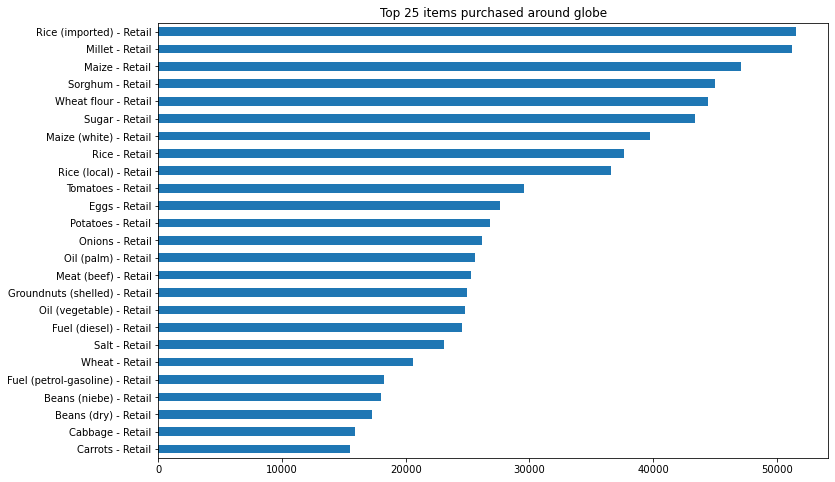

In [19]:
items.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.title("Top 25 items purchased around globe")

In [20]:
gfp['product'].nunique()

838

In [21]:
to_drop1 = gfp[gfp['product'].apply(lambda x: x.startswith('Fuel'))].index
to_drop2 = gfp[gfp['product'].apply(lambda x: x.startswith('Wage'))].index
to_drop3 = gfp[gfp['product'].apply(lambda x: x.startswith('Transport'))].index
to_drop4 = gfp[gfp['product'].isin(['Alcohol (spray)','Bleach (chlorine)', 'Surgical mask', 'Hand sanitizer (gel)','Plastic gloves', 'Internet bundle', 
           'Electricity', 'Water', 'Curd', 'Sour cream', 'Multipurpose soap',  'Toothbrush', 'Sanitary pads', 'Toothpaste',
           'Firewood', 'Exchange rate'])].index

In [22]:
gfp = gfp.drop(to_drop1)
gfp = gfp.drop(to_drop2)
gfp = gfp.drop(to_drop3)
gfp = gfp.drop(to_drop4)

In [23]:
gfp.head()

,country,city,market,product,currency,type,unit,mp_month,mp_year,price
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0


In [24]:
gfp["date"] = gfp["mp_year"].astype(str) + '-' + gfp["mp_month"].astype(str)

### Feature Engineering

In [25]:
gfp["continent"] = gfp["country"].map({'Afghanistan': "Asia",
  'Algeria': "Africa",
  'Angola': "Africa", 
  'Argentina':"Americas",
  'Armenia': "Asia",
  'Azerbaijan': "Asia",
  'Bangladesh': "Asia",
  'Bassas da India': "Asia",
  'Belarus': "Europe",
  'Benin': "Africa",
  'Bhutan': "Asia",
  'Bolivia':"Americas", 
  'Burkina Faso': "Africa",
  'Burundi': "Africa", 
  'Cambodia': "Asia",
  'Cameroon': "Africa",
  'Cape Verde': "Africa",
  'Central African Republic': "Africa",
  'Chad': "Africa",
  'China': "Asia",
  'Colombia': "Americas",
  'Congo': "Africa",
  'Costa Rica':"Americas",
  "Cote d'Ivoire": "Africa",
  'Democratic Republic of the Congo': "Africa",
  'Djibouti': "Africa",
  'Dominican Republic':"Americas",
  'Ecuador':"Americas",
  'Egypt': "Africa",
  'El Salvador': "Americas",
  'Eritrea': "Africa",
  'Ethiopia':"Africa",
  'Gabon': "Africa", 
  'Gambia': "Africa",
  'Georgia':"Europe", 
  'Ghana': "Africa",
  'Guatemala':"Americas",
  'Guinea': "Africa",
  'Guinea-Bissau': "Africa",
  'Haiti': "Americas",
  'Honduras':"Americas",
  'Indonesia': "Asia",
  'Iran  (Islamic Republic of)': "Asia",
  'Iraq': "Asia",
  'Japan': "Asia",
  'Jordan': "Asia",
  'Kazakhstan': "Asia",
  'Kenya': "Africa",
  'Kyrgyzstan': "Asia",
  "Lao People's Democratic Republic":"Asia",
  'Lebanon': "Asia",
  'Lesotho': "Africa",
  'Liberia': "Africa", 
  'Libya': "Africa",
  'Madagascar': "Africa",
  'Malawi': "Africa",
  'Mali': "Africa",
  'Mauritania': "Africa",
  'Mexico': "Americas",
  'Moldova Republic of':"Europe",
  'Mongolia': "Asia",
  'Mozambique': "Africa",
  'Myanmar': "Asia", 
  'Namibia': "Africa",
  'Nepal': "Asia",
  'Nicaragua':"Americas",
  'Niger': "Africa",
  'Nigeria': "Africa",
  'Pakistan': "Asia",
  'Panama':"Americas",
  'Paraguay': "Americas",
  'Peru':"Americas",
  'Philippines': "Asia",
  'Russian Federation':"Europe",
  'Rwanda': "Africa",
  'Senegal': "Africa",
  'Sierra Leone': "Africa",
  'Somalia': "Africa",
  'South Africa': "Africa",
  'South Sudan': "Africa",
  'Sri Lanka': "Asia",
  'State of Palestine': "Asia",
  'Sudan': "Africa", 
  'Swaziland': "Africa",
  'Syrian Arab Republic': "Asia",
  'Tajikistan': "Asia",
  'Thailand': "Asia",
  'Timor-Leste': "Asia", 
  'Togo': "Africa",
  'Turkey': "Asia",
  'Uganda': "Africa", 
  'Ukraine': "Europe",
  'United Republic of Tanzania': "Africa",
  'Venezuela': "Americas",
  'Viet Nam': "Asia", 
  'Yemen': "Asia",
   'Zambia': "Africa", 
  'Zimbabwe': "Africa"})
gfp.head()

,country,city,market,product,currency,type,unit,mp_month,mp_year,price,date,continent
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,2014-1,Asia
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,2014-2,Asia
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,2014-3,Asia
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,2014-4,Asia
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,2014-5,Asia


In [26]:
from datetime import datetime
gfp['date'] = pd.to_datetime(gfp['date'])
gfp.set_index('date', inplace=True)
gfp.sort_values(by=['date'], inplace=True)

In [27]:
gfp.head()

,country,city,market,product,currency,type,unit,mp_month,mp_year,price,continent
date,,,,,,,,,,,
2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00,Asia
2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,1900.00,Africa
2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00,Africa
2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62,Americas
2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64,Americas


In [28]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1871957 rows and 11 columns


In [29]:
gfp.to_csv('wfpvam_foodprices.csv')

In [30]:
foodprice = pd.read_csv('wfpvam_foodprices.csv', index_col='date')
#refugee = pd.read_csv('refugee.csv')
#climate = pd.read_csv('....csv')
#currency = pd.read_csv('....csv')

In [31]:
#gfp_climate = pd.merge(gfp, climate, on=['country'])
#gfp_refugee = pd.merge(gfp, refugee, on=['mp_year'])
#combine_gfp = pd.merge(currency, gfp_climate_refugee, on=['country'])